# Model selection

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [26]:
import sys
import os
sys.path.append('../src/models')
from predict_model import create_perf_metrics

In [27]:
# open predictor and target variables 
with open('../data/processed/predictor.pickle', 'rb') as file:
    X = pickle.load(file)
with open('../data/processed/target.pickle', 'rb') as file:
    y = pickle.load(file)

In [28]:
np.unique(y)

array([1., 2., 3.])

In [29]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    stratify=y)

## Logistic regression

In [30]:
log_reg = LogisticRegression(C=2, penalty='l2', 
                            solver='lbfgs', 
                            multi_class='auto', 
                            max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_test = log_reg.predict(X_test)

In [31]:
# call performance metric function
log_reg_metrics = create_perf_metrics(y_test, y_pred_test)

                Pred Clinton  Pred Trump  Pred Nonvoter/Other
Clinton                  642          52                   15
Trump                     73         612                   11
Nonvoter/Other           104          79                   12 


 90.60000000000001 percent that were predicted Clinton were actually Clinton
 87.9 percent that were predicted Trump were actually Trump



In [35]:
# storing each group's coeficients as dicts
clinton_list = log_reg.coef_[0]
clinton_coef = dict(zip(X.columns, clinton_list))
trump_list = log_reg.coef_[1]
trump_coef = dict(zip(X.columns, trump_list))
other_list = log_reg.coef_[2]
other_coef = dict(zip(X.columns, other_list))

## Random forest

In [36]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)

In [37]:
rf_metrics = create_perf_metrics(y_test, y_pred_test)

                Pred Clinton  Pred Trump  Pred Nonvoter/Other
Clinton                  620          81                    8
Trump                     72         622                    2
Nonvoter/Other           106          86                    3 


 87.4 percent that were predicted Clinton were actually Clinton
 89.4 percent that were predicted Trump were actually Trump



## K Nearest Neighbors

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

In [39]:
knn_metrics = create_perf_metrics(y_test, y_pred_test)

                Pred Clinton  Pred Trump  Pred Nonvoter/Other
Clinton                  626          69                   14
Trump                    109         579                    8
Nonvoter/Other           100          89                    6 


 88.3 percent that were predicted Clinton were actually Clinton
 83.2 percent that were predicted Trump were actually Trump



## Support vector machines

In [40]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_test = svm.predict(X_test)

In [41]:
# call performance metric function
svm_metrics = create_perf_metrics(y_test, y_pred_test)

                Pred Clinton  Pred Trump  Pred Nonvoter/Other
Clinton                  645          51                   13
Trump                     78         611                    7
Nonvoter/Other           109          78                    8 


 91.0 percent that were predicted Clinton were actually Clinton
 87.8 percent that were predicted Trump were actually Trump



## K-means clustering

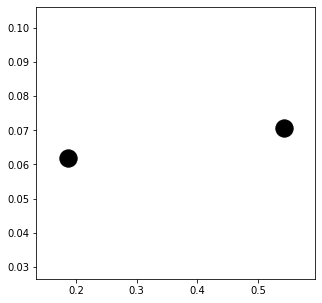

In [42]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

labels = kmeans.labels_
plt.figure(figsize=(5,5))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=300)

y_pred = kmeans.predict(X)
metrics.silhouette_score(X, labels, metric='euclidean')
metrics.calinski_harabasz_score(X, labels)

y_pred_df = pd.DataFrame(y_pred, columns=['predicted'])
df = pd.DataFrame(y, columns=['presvote16post_2016']).join(y_pred_df)
num_cluster_trump = df.loc[(df.presvote16post_2016 == 2) & (df.predicted == 0)].count()
num_cluster_clinton = df.loc[(df.presvote16post_2016 == 1)].count()

# Parameter tuning

gridsearchcv

# Test 

Which model does better with test data? 
Stick with one metric
Whatever model is best, variation between train and test,etc. 